<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/Deep_Learning_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(raw_df.head())
print(data)

          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
features_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=features_names)
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
X = X.drop('CHAS', axis=1)
print(X.head())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB
None


In [ ]:
y = pd.DataFrame(target)
print(y)

        0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [ ]:
boston_df = pd.DataFrame(data, columns = features_names)
boston_df["MEDIV"] = target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDIV  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
boston_df = boston_df.drop('CHAS', axis=1)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDIV    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


<ipython-input-9-bcc30937391c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['MEDIV'], bins=10)


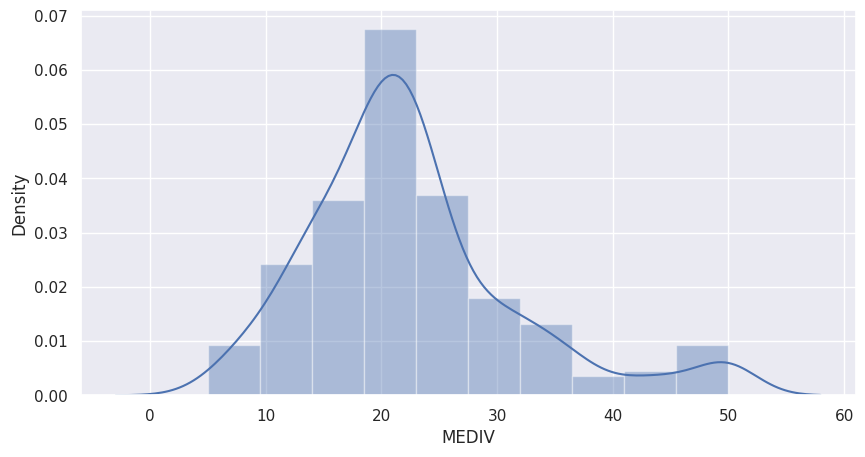

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(boston_df['MEDIV'], bins=10)
plt.show()

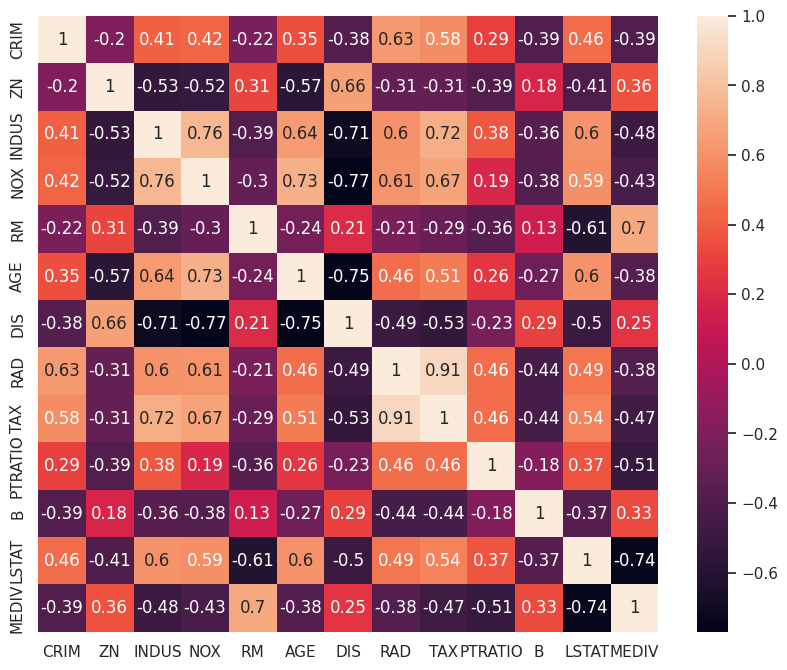

In [ ]:
correlation_matrix = boston_df.corr().round(2)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scalerX = MinMaxScaler()
scalerX.fit(X_train)
X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)
print(X_train_norm)

[[6.68786251e-05 8.42105263e-01 5.68181818e-02 ... 4.44444444e-01
  9.84971506e-01 1.17549669e-01]
 [9.93400485e-04 0.00000000e+00 2.01612903e-01 ... 6.88888889e-01
  9.51233043e-01 2.67108168e-01]
 [4.30976426e-01 0.00000000e+00 6.46627566e-01 ... 8.00000000e-01
  1.00000000e+00 7.96357616e-01]
 ...
 [1.36513324e-02 0.00000000e+00 7.00879765e-01 ... 1.88888889e-01
  9.15603409e-01 7.89183223e-02]
 [1.42861735e-04 8.68421053e-01 5.75513196e-02 ... 1.88888889e-01
  9.96167230e-01 3.80794702e-02]
 [1.48863951e-03 0.00000000e+00 2.36436950e-01 ... 5.44444444e-01
  9.65883302e-01 1.12582781e-01]]


In [ ]:
print(X_test_norm)

[[ 3.49005262e-04  8.42105263e-01  3.88563050e-02 ... -4.44444444e-02
   1.00000000e+00  6.48454746e-02]
 [ 1.09096460e-03  3.15789474e-01  1.63856305e-01 ...  4.00000000e-01
   9.94250845e-01  2.94426049e-01]
 [ 4.10713439e-04  0.00000000e+00  4.92302053e-01 ...  3.77777778e-01
   9.89661607e-01  3.25055188e-01]
 ...
 [ 5.14089134e-01  0.00000000e+00  6.46627566e-01 ...  8.00000000e-01
   2.21771143e-01  9.72682119e-01]
 [ 3.24985157e-03  0.00000000e+00  2.10410557e-01 ...  4.88888889e-01
   9.51106965e-01  6.04304636e-02]
 [ 8.90216320e-04  0.00000000e+00  3.79398827e-01 ...  6.88888889e-01
   9.66791064e-01  1.37693157e-01]]


In [ ]:
scalerY = MinMaxScaler()
scalerY.fit(y_train)
y_train_norm = scalerY.transform(y_train)
y_test_norm = scalerY.transform(y_test)
print(y_train_norm[0:10])

[[0.43333333]
 [0.33333333]
 [0.        ]
 [0.35111111]
 [0.24444444]
 [0.10444444]
 [0.36      ]
 [1.        ]
 [0.33333333]
 [0.48      ]]


In [ ]:
print(y_test_norm[0:10])

[[0.62888889]
 [0.33555556]
 [0.40666667]
 [0.44444444]
 [0.27111111]
 [0.22666667]
 [0.32222222]
 [0.58888889]
 [0.4       ]
 [0.47777778]]


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [ ]:
results = model.fit(X_train_norm, y_train_norm, epochs=200, batch_size=32, validation_data=(X_test_norm, y_test_norm))

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0656 - mae: 0.2037 - val_loss: 0.0221 - val_mae: 0.1144
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0322 - mae: 0.1303 - val_loss: 0.0138 - val_mae: 0.0862
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mae: 0.0912 - val_loss: 0.0099 - val_mae: 0.0735
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mae: 0.0826 - val_loss: 0.0076 - val_mae: 0.0656
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mae: 0.0701 - val_loss: 0.0069 - val_mae: 0.0610
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mae: 0.0822 - val_loss: 0.0064 - val_mae: 0.0620
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mae: 0.0666 - val_loss: 0.0083 - val_mae: 0.0731
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mae: 0.0674 - val_loss: 0.0062 - val_mae: 0.0609
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [ ]:
print(results.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


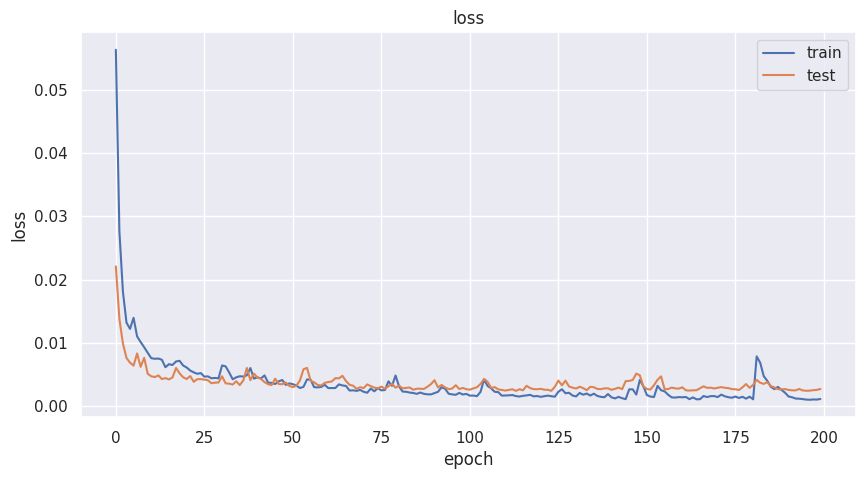

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

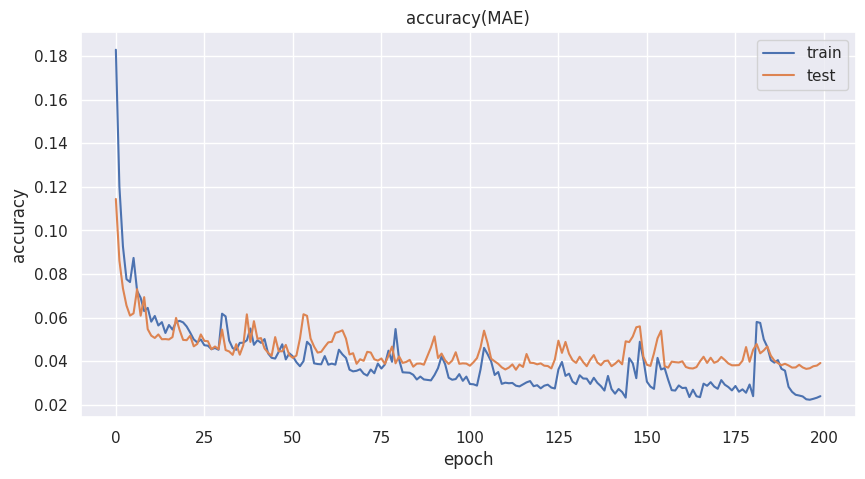

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results.history['mae'])
plt.plot(results.history['val_mae'])
plt.title('accuracy(MAE)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test_norm).flatten()
y_pred_inverse = scalerY.inverse_transform(y_pred.reshape(-1,1))
print(y_pred_inverse[0:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[40.33842 ]
 [18.908932]
 [23.635172]
 [25.85003 ]
 [13.683046]
 [15.629216]
 [17.117395]
 [34.432755]
 [24.919212]
 [26.965258]]


In [ ]:
print('MAE: %.2f' % mean_squared_error(y_test, y_pred_inverse))

MAE: 5.43


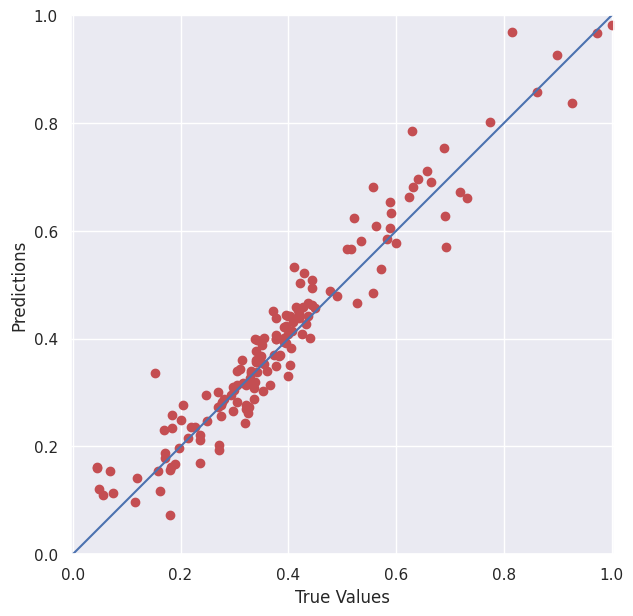

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_norm, y_pred, c = 'r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1],[0,1])
plt.show()